### 기본 Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
# 한글 출력을 위한 설정
from matplotlib import font_manager, rc
import platform
if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)

## 탐색적 시각화 이용

### 히스토그램

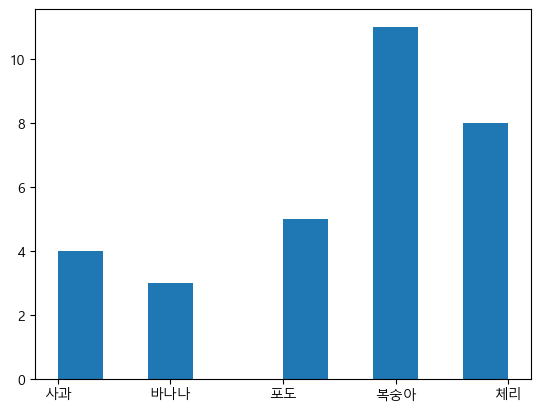

In [16]:
# lovefruits.cvs
# 첫행은 컬럼이름, 구분자는 , 한글존재함
df=pd.read_csv('./data/lovefruits.csv', encoding='CP949')
# df.head()
# 데이터 정보 확인하기
# df.info()
# 빈도수 확인을 해보자.
data=df['선호과일'].value_counts(sort=False)
# print(data)
plt.hist(df['선호과일'])
plt.show()

### 이번엔 수치 값으로 해보자. 문자열 말고

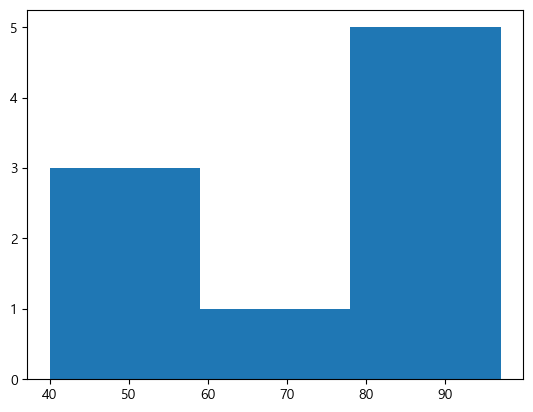

In [21]:
df=pd.read_csv('./data/student.csv', encoding='cp949')
# df.head()
# df.info()
# 점수 처럼 여러 값이 존재한다면?
# 구간을 나눠서 시각화하는 것이 좋아 보인다.
plt.hist(df['수학'], bins=3)
plt.show()

## 산포도

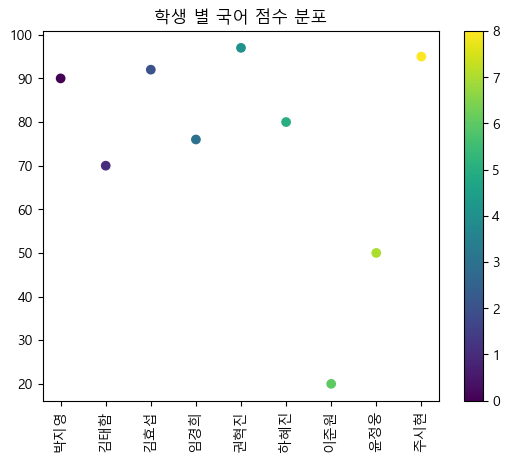

In [36]:
df=pd.read_csv('./data/student.csv', encoding='cp949')
plt.figure()
# 색상 설정
colormap=df.index
plt.scatter(x=df.index, y=df['국어'], marker='o', c=colormap)
# 이게 무슨 시각화 그래프인데?
plt.title('학생 별 국어 점수 분포')
# 누가 누군지 모르겠어.
plt.xticks(range(0,len(df['국어'])), df['이름'], rotation='vertical')
plt.colorbar()
plt.show()

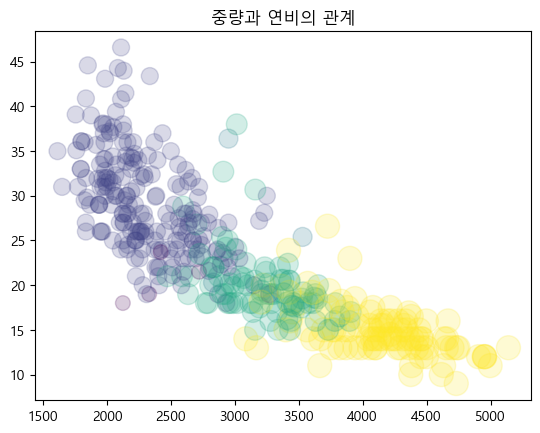

In [41]:
# 여러 개의 컬럼을 이용한 산포도
# 이 데이터는 회귀분석하는데 좋은 데이터임 (다항)
df=pd.read_csv('./data/noheader_auto-mpg.csv', header=None)
df.columns=['mpg','cylinders', 'displacement', 'horsepower',
            'weight', 'acceleration', 'model year', 'origin', 'name']
# df.head()
# 존재하지 않는 컬럼 -> 추가됨
df['cylinders_size']=df['cylinders']/df.cylinders.max()*300
# df.head()
colormap=df['cylinders']
plt.scatter(x=df['weight'], y=df['mpg'], s=df['cylinders_size'], c=colormap, alpha=0.2) 
plt.title("중량과 연비의 관계")
plt.show()

## Pie Chart

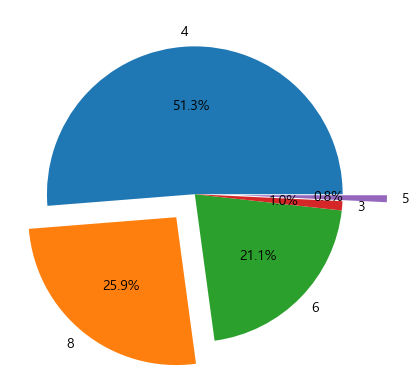

In [53]:
x=df['cylinders'].value_counts()
# print(type(x))
# 중심으로부터 떨어뜨리는 비율
explode=(0,0.2,0,0,0.3)
plt.pie(x, labels=x.index, autopct='%1.1f%%', explode=explode)
plt.show()

### BoxPlot

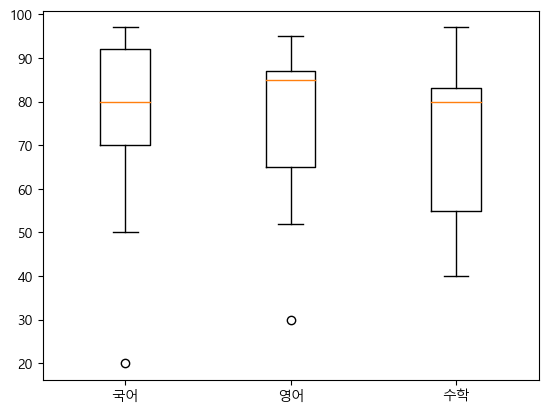

In [63]:
df=pd.read_csv('./data/student.csv', encoding='cp949')
plt.boxplot((df['국어'], df['영어'], df['수학']), labels=('국어', '영어','수학'))
plt.show()

## Seaborn

In [66]:
import seaborn as sns
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


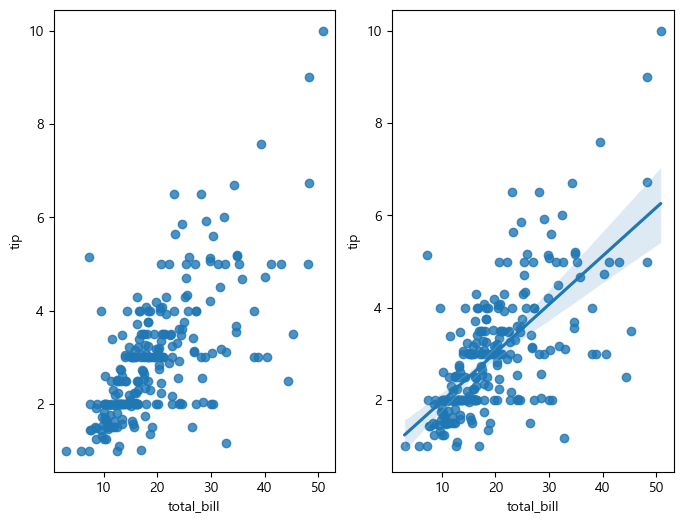

In [71]:
fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.set_style('darkgrid')
sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False, ax=ax1)
sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=True, ax=ax2)
plt.show()

## Folium

In [73]:
!pip install folium

     -------------------------------------- 102.3/102.3 kB 2.9 MB/s eta 0:00:00


In [80]:
import folium
m=folium.Map(location=[37.572656, 126.973304], zoom_start=15)
# 마커 출력
folium.Marker(location=[37.572656, 126.973304], popup='KB카드', icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker(location=[37.569027, 126.987279], popup='Mega IT', icon=folium.Icon(icon='cloud')).add_to(m)
folium.RegularPolygonMarker(location=[37.602638,126.955252], popup='mino', icon=folium.Icon(icon='cloud'), 
                            number_of_sides=6, radius=30, color='magenta').add_to(m)
# 저장하기
# m.save('map.html')
m

In [83]:
df=pd.read_excel('./data/서울지역_대학교_위치.xlsx')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  47 non-null     object 
 1   위도          47 non-null     float64
 2   경도          47 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [89]:
# 서울 지도 출력하기
m=folium.Map(location=[37.55, 126.98], zoom_start=12)
# df의 데이터를 순회해보자.
# 우선 확인 먼저
# for name, lat, lng  in zip(df['Unnamed: 0'], df['위도'], df['경도']):
#     print(name, lat, lng)
for name, lat, lng  in zip(df['Unnamed: 0'], df['위도'], df['경도']):
    folium.CircleMarker(location=[lat, lng], popup=name, radius=10, 
                  color='magenta', fill=True, fill_color='cyan', fill_opacity=0.7).add_to(m)
m

### 경기도 인구 단계 구분도

In [102]:
# json 파싱을 위한 패키지
import json
# 경기도 인구 데이터 가져오기
df=pd.read_excel('./data/경기도인구데이터.xlsx')
# df.head()
# df.info()
# 컬럼의 이름이 숫자 형태라서 사용하기 번거로울 수 있기에, 문자열로 변환
df.columns=df.columns.map(str)
# 행정 구역 경계와 관련된 json파일을 열어서 파싱
try:
    geo_data=json.load(open('./data/경기도행정구역경계.json', encoding='utf-8'))
except:
    geo_data=json.load(open('./data/경기도행정구역경계.json', encoding='utf-8-sig'))
# print(geo_data)
# 지도 생성
df.index=df['구분']
g_map=folium.Map(location=[37.5502, 126.982], zoom_start=9, titles='Stamen Terrain')
# g_map
# 단계 구분도 만들기
folium.Choropleth(geo_data=geo_data, data=df['2015'], columns=[df.index, df['2015']],
                                                              fill_color='YlOrRd', fill_opacity=0.7,line_opacity=0.3,
                                                              threshold_scale=[10000,100000,300000,500000,700000],
                                                              key_on='feature.properties.name').add_to(g_map)
g_map

<Axes: >

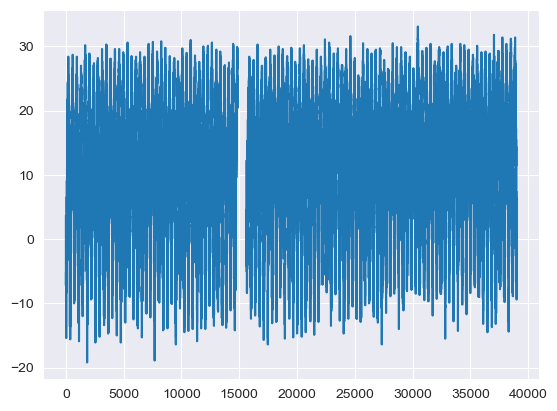

In [106]:
df=pd.read_csv('./data/seoul.csv', encoding='cp949')
df.head()
df['avg'].plot()

In [115]:
df=pd.DataFrame([['바밤바','안녕하세요','헬로우', '니하오', '바밤바'],
             ['한국', '미국', '중국', '일본','한국']])
df=df.T # 전치
# 중복 여부 확인
# print(df.duplicated())
df.drop_duplicates(inplace=True)
print(df.duplicated())
df

0    False
1    False
2    False
3    False
dtype: bool


,0,1
0,바밤바,한국
1,안녕하세요,미국
2,헬로우,중국
3,니하오,일본


## 함수 적용

In [119]:
def f(data):
    return data+'...'
# lambda 라면? lmabad data : data+'...'
# print(df[0].apply(f)) # Series는 셀 단위 적용
# print(df.apply(f)) # DataFrame은 행이나 열 단위 적용, 기본은 열 단위적용
# 이번엔 람다로 바꿔보자.
print(df[0].apply(lambda data : data+'..'))
print(df.apply(lambda data : data+'..!'))
# python 람다식은 한줄인 것을 기억하자.

0      바밤바..
1    안녕하세요..
2      헬로우..
3      니하오..
Name: 0, dtype: object
          0      1
0    바밤바..!  한국..!
1  안녕하세요..!  미국..!
2    헬로우..!  중국..!
3    니하오..!  일본..!


In [128]:
titanic=sns.load_dataset('titanic')
# titanic.head()
# 특정한 셀만 쪼개보기
df=titanic[['age','fare']]
# df.head()
def min_max(data):
    return data.max()-data.min()
result=df.apply(min_max, axis=0)
result # 열 단위로 들어가니까
# 결과는 열 당 1개씩만 나올 수 밖에 없어.
# 행 단위로 한다면?
# result2=df.apply(min_max, axis=1)
# result2
# 한 행에서 하기에 말이 안되는 연산이긴 함.

age      79.5800
fare    512.3292
dtype: float64

### Pipe

In [135]:
df=titanic[['age','fare']]
# df.head()
# 하나의 데이터를 가지고 null 여부를 판단하는 함수 대입
# 셀 단위로 적용을 해서 DataFrame 리턴
def missing_value(x):
    return x.isnull()
# 집계 함수를 곁들인, 열 단위로 대입해서 집계를 수행한 뒤에 Series 리턴
print(df.pipe(lambda x: missing_value(x).sum()))
def missing_count(x):
    return missing_value(x).sum()
# Series를 리턴하는 함수를 대입하면 하나의 값을 리턴
print(df.pipe(lambda x: missing_count(x).sum()))

age     177
fare      0
dtype: int64
177


### 열 편집

In [141]:
df=pd.read_excel('./data/주가데이터.xlsx')
# df.head()# 연월일에 - 가 들어간다.
# df.info() # 연월일은 datetime64[ns] 타입이다.
# 자료형이 datetime이라 split 사용 불가능
# 데이터 타입 변경
# astype을 호출해서 변경하자.
# map 함수에 형을 변경할 수 있는 함수를 대입하자.
df['연월일']=df['연월일'].astype('str')
dates=df['연월일'].str.split('-')
# dates.head() # list 형태로 쪼개졌습니다.
df['연']=dates.str.get(0)
df['월']=dates.str.get(1)
df['일']=dates.str.get(2)
df.head() # 연/ 월 / 일로 잘 쪼개놨다.

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26


### 데이터 결합

In [149]:
df1=pd.DataFrame({
    'a':['a0','a1','a2','a3'],
    'b':['b0','b1','b2','b3'],
    'c':['c0','c1','c2','c3']
}, index=[1,2,3,4])
df2=pd.DataFrame({
    'a':['a2','a3','a4','a5'],
    'b':['b2','b3','b4','b5'],
    'd':['d2','d3','d4','d5']
}, index=[2,3,4,5])
print(pd.concat([df1,df2]))
# 기본적으로 행 방향으로 결합
# 동일한 컬럼은 값이 있지만, 한쪽에만 존재하는 컬럼은
# 반대쪽은 NaN 처리가 된다.
print(pd.concat([df1,df2], axis=1)) #행방향 결합 - outer join
print(pd.concat([df1,df2], axis=1, join='inner')) #행방향 결합
# inner join, 양쪽 모두에 존재하는 데이터만 결합

    a   b    c    d
1  a0  b0   c0  NaN
2  a1  b1   c1  NaN
3  a2  b2   c2  NaN
4  a3  b3   c3  NaN
2  a2  b2  NaN   d2
3  a3  b3  NaN   d3
4  a4  b4  NaN   d4
5  a5  b5  NaN   d5
     a    b    c    a    b    d
1   a0   b0   c0  NaN  NaN  NaN
2   a1   b1   c1   a2   b2   d2
3   a2   b2   c2   a3   b3   d3
4   a3   b3   c3   a4   b4   d4
5  NaN  NaN  NaN   a5   b5   d5
    a   b   c   a   b   d
2  a1  b1  c1  a2  b2  d2
3  a2  b2  c2  a3  b3  d3
4  a3  b3  c3  a4  b4  d4


### first_combine

In [153]:
a=pd.Series([np.nan, 2.5,np.nan, 3.5, 4.6, np.nan])
b=pd.Series(np.arange(len(a), dtype=np.float64))
# print(a)
# print(b)
# NaN 있는 series랑 없는 series 생성
r=np.where(pd.isnull(a),b, a)
# 조건이 true 면 data1, False면 Data2를 적용
# a값이 null이면 b의 값을 넣어주고 싶다. 이말이야
print(r) #가로 방향 
print(a.combine_first(b)) # 세로 방향
# numpy의 일차원 배열은 출력할 때, 행방향이기 때문이다.

[0.  2.5 2.  3.5 4.6 5. ]
0    0.0
1    2.5
2    2.0
3    3.5
4    4.6
5    5.0
dtype: float64


### Merge

In [159]:
price=pd.read_excel('./data/stock price.xlsx')
valuation=pd.read_excel('./data/stock valuation.xlsx')
# price.head()
# value.head()
inner_join=pd.merge(price, valuation)
# print(inner_join) # 헉 겹치는 컬럼 이 있네?
# 1. 지우기 , 2. 골라서 복사해오기(필터)
# outer join도 가능하답니다.
outer_join=pd.merge(price, valuation, how='outer')
print(outer_join) # outer로 하니까 슬슬 NaN이 보인다.

        id stock_name          value     price       name           eps  \
0   128940       한미약품   59385.666667  421000.0        NaN           NaN   
1   130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   
2   138250      엔에스쇼핑   14558.666667   13200.0        NaN           NaN   
3   139480        이마트  239230.833333  254500.0        이마트  18268.166667   
4   142280     녹십자엠에스     468.833333   10200.0        NaN           NaN   
5   145990        삼양사   82750.000000   82000.0        삼양사   5741.000000   
6   185750        종근당   40293.666667  100500.0        종근당   3990.333333   
7   192400      쿠쿠홀딩스  179204.666667  177500.0        NaN           NaN   
8   199800         툴젠   -2514.333333  115400.0        NaN           NaN   
9   204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667   
10  136480        NaN            NaN       NaN         하림    274.166667   
11  138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   
12  161390        NaN    

### Join

In [161]:
price=pd.read_excel('./data/stock price.xlsx', index_col='id')
valuation=pd.read_excel('./data/stock valuation.xlsx', index_col='id')
# bound 호출, unbound 호출, 둘은 같은 결과를 나오게한다.
# python만 class이름으로 부를 수 있다. 인스턴스로 부르는게 아니라.
print(pd.DataFrame.join(price, valuation)) # class로 instance 메서드 호출 : unbound 호출
print(price.join(valuation)) # 인스턴스로 메서드 호출 : bound 호출

       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN